In [1]:
from underlying import Underlying
from option import Option
from trader import Trader

import matplotlib.pyplot as plt
from tqdm import tqdm
from quantile_hedging_calculator import *
import numpy as np
import pandas as pd

In [2]:
def payoff_call(X, K):
    return np.maximum(X.iloc[:,-1]- K, 0)
def payoff_put(X, K):
    return np.maximum(K - X.iloc[:,-1], 0)

In [3]:
mu = 0.01
sigma =  0.11
r = 0.05
T = 1
X0 = 100
repeat = 100

## Full hedging - Vanilla Call

In [4]:
K = 80

In [5]:
underlying = Underlying(mu, sigma, r, 250)

In [6]:
_, reality = underlying.simulate_P(repeat, T)

In [7]:
vanilla_call = Option(underlying, lambda X: payoff_call(X, K), T)

In [8]:
BS_price_call = vanilla_call.get_MC_price(X0, 0)
BS_price_call

23.935372733493434

In [9]:
money_time_call = pd.DataFrame(np.zeros(reality.shape))
delta_time_call = pd.DataFrame(np.zeros(reality.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = BS_price_call)
    money, delta, _ = trader.simulate_hedging(vanilla_call, X0*reality.iloc[[i],:], update_freq = 1)
    money_time_call.loc[i] = money
    delta_time_call.loc[i] = delta

100%|█████████████████████████████████████████| 100/100 [01:18<00:00,  1.27it/s]


<AxesSubplot:>

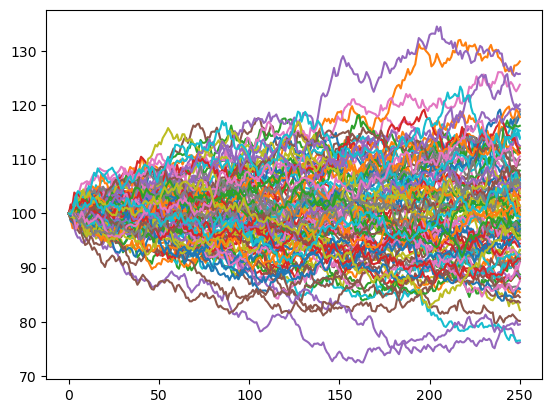

In [10]:
(X0*reality).T.plot(legend = False)

<AxesSubplot:>

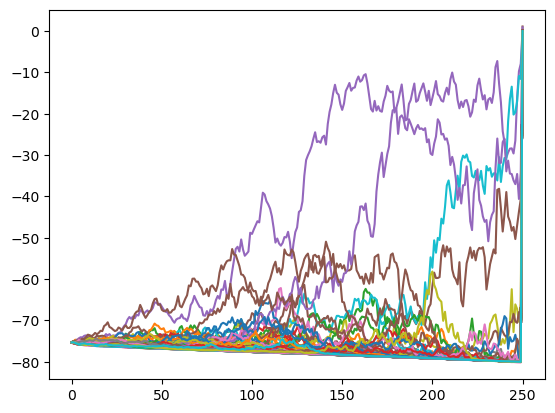

In [11]:
(money_time_call).T.plot(legend = False)

<AxesSubplot:>

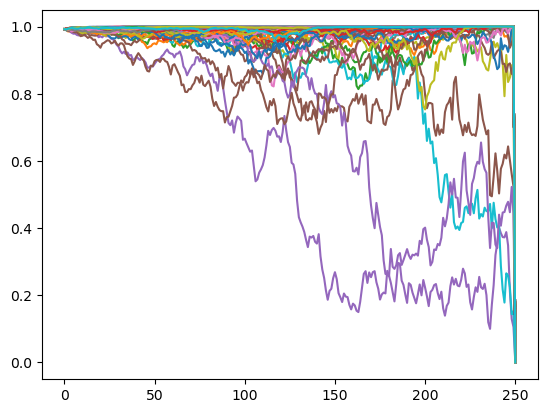

In [12]:
(delta_time_call).T.plot(legend = False)

(array([ 2., 91.,  3.,  2.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([-0.16425227, -0.03566204,  0.09292818,  0.2215184 ,  0.35010863,
         0.47869885,  0.60728907,  0.7358793 ,  0.86446952,  0.99305975,
         1.12164997]),
 <BarContainer object of 10 artists>)

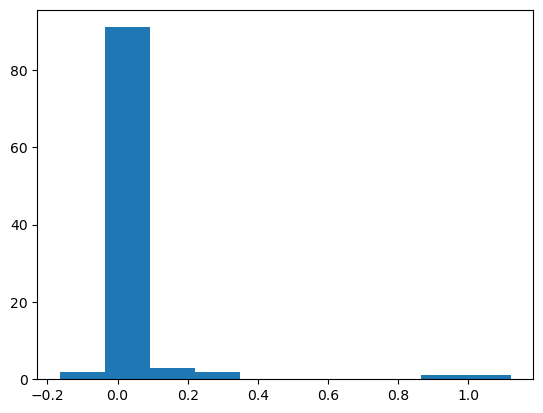

In [13]:
plt.hist(money_time_call.iloc[:,-1])

## Full hedging - Vanilla Put

In [14]:
K = 120

In [15]:
underlying = Underlying(mu, sigma, r, 250)

In [16]:
_, reality = underlying.simulate_P(repeat, T)

In [17]:
vanilla_put = Option(underlying, lambda X: payoff_put(X, K), T)

In [18]:
BS_price_put = vanilla_put.get_MC_price(X0, 0)
BS_price_put

14.780532889657541

In [19]:
money_time_put = pd.DataFrame(np.zeros(reality.shape))
delta_time_put = pd.DataFrame(np.zeros(reality.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = BS_price_put)
    money, delta, _ = trader.simulate_hedging(vanilla_put, X0*reality.iloc[[i],:], update_freq = 1)
    money_time_put.loc[i] = money
    delta_time_put.loc[i] = delta

100%|█████████████████████████████████████████| 100/100 [01:22<00:00,  1.22it/s]


<AxesSubplot:>

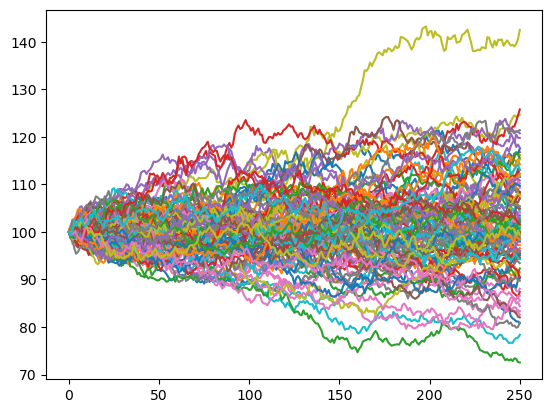

In [20]:
(X0*reality).T.plot(legend = False)

<AxesSubplot:>

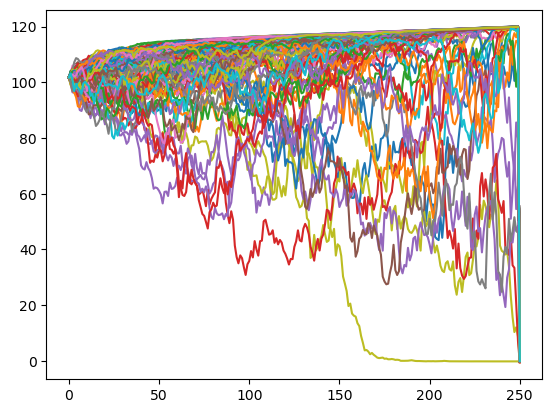

In [21]:
(money_time_put).T.plot(legend = False)

<AxesSubplot:>

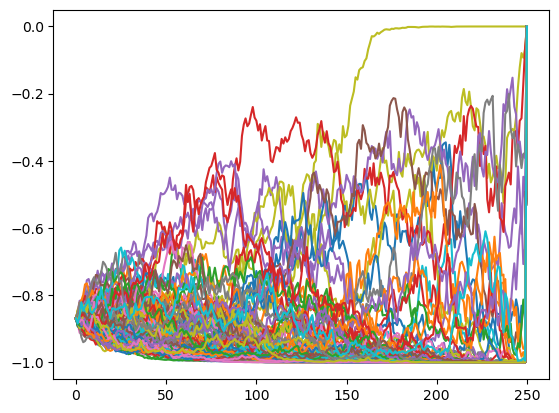

In [22]:
(delta_time_put).T.plot(legend = False)

(array([ 3.,  8., 56., 27.,  0.,  4.,  0.,  1.,  0.,  1.]),
 array([-0.58360161, -0.40438669, -0.22517177, -0.04595685,  0.13325807,
         0.31247299,  0.49168791,  0.67090283,  0.85011775,  1.02933267,
         1.20854759]),
 <BarContainer object of 10 artists>)

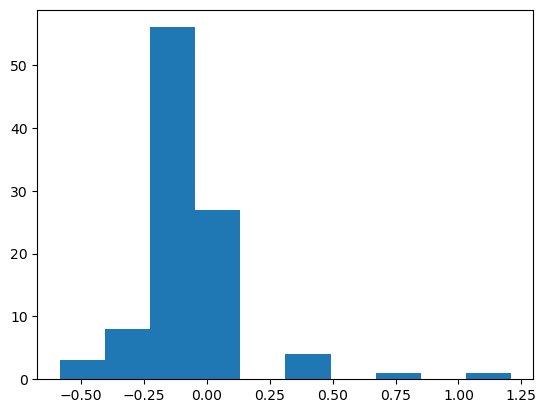

In [23]:
plt.hist(money_time_put.iloc[:,-1])

## Quantile hedging with half of required initial capital- Vanilla Call

In [24]:
K = 80

In [25]:
underlying = Underlying(mu, sigma, r, 250)

In [26]:
_, reality = underlying.simulate_P(repeat, T)

In [27]:
money_time_call = pd.DataFrame(np.zeros(reality.shape))
delta_time_call = pd.DataFrame(np.zeros(reality.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = BS_price_call/2)
    money, delta, success_prob = trader.simulate_hedging(vanilla_call, X0*reality.iloc[[i],:], update_freq = 1, limited_capital = True)
    money_time_call.loc[i] = money
    delta_time_call.loc[i] = delta
print(f'Success probability with initial capital={BS_price_call/2:.2f} is: {success_prob}')

100%|█████████████████████████████████████████| 100/100 [01:49<00:00,  1.10s/it]

Success probability with initial capital=11.97 is: 0.7895


<AxesSubplot:>

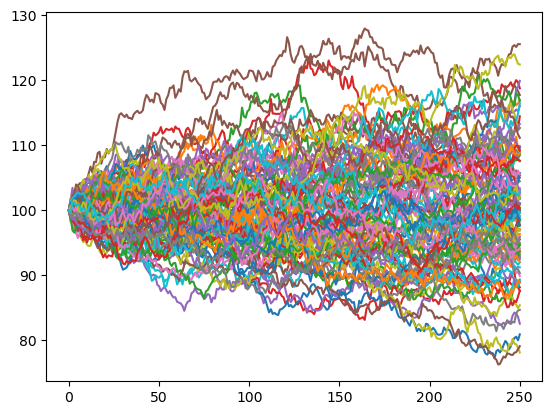

In [28]:
(X0*reality).T.plot(legend = False)

<AxesSubplot:>

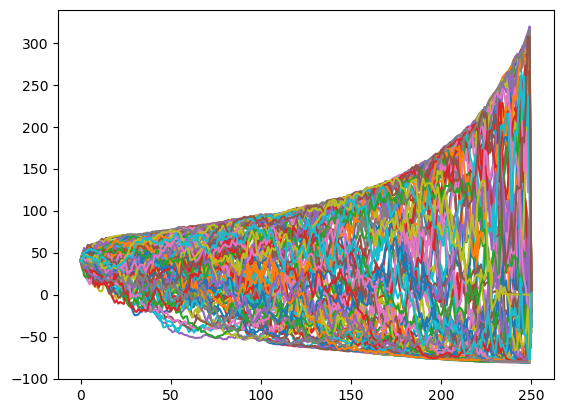

In [29]:
(money_time_call).T.plot(legend = False)

<AxesSubplot:>

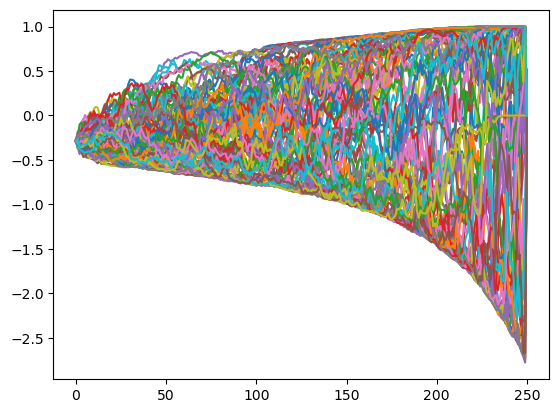

In [30]:
(delta_time_call).T.plot(legend = False)

(array([ 2.,  6.,  2.,  2.,  1.,  1.,  6.,  5.,  1., 74.]),
 array([-45.28066205, -40.50820007, -35.7357381 , -30.96327612,
        -26.19081415, -21.41835217, -16.64589019, -11.87342822,
         -7.10096624,  -2.32850427,   2.44395771]),
 <BarContainer object of 10 artists>)

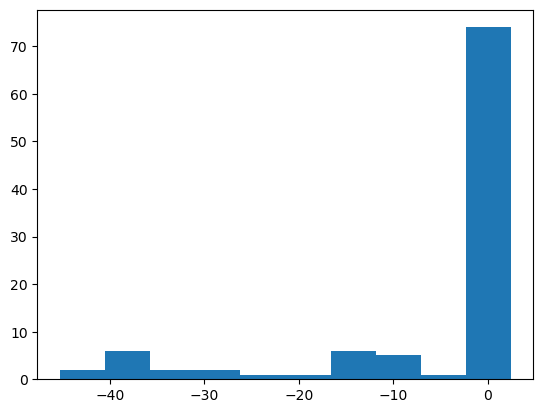

In [31]:
plt.hist(money_time_call.iloc[:,-1])

In [32]:
print(f'Empiric success probability with initial capital={BS_price_call/2:.2f} is: {(money_time_call.iloc[:,-1] >= -0.1*BS_price_call/2).mean()}')

Empiric success probability with initial capital=11.97 is: 0.71


## Quantile hedging with half of required initial capital- Vanilla Put

In [33]:
K = 120

In [34]:
underlying = Underlying(mu, sigma, r, 250)

In [35]:
_, reality = underlying.simulate_P(repeat, T)

In [36]:
money_time_put = pd.DataFrame(np.zeros(reality.shape))
delta_time_put = pd.DataFrame(np.zeros(reality.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = BS_price_put/2)
    money, delta, success_prob = trader.simulate_hedging(vanilla_put, X0*reality.iloc[[i],:], update_freq = 1, limited_capital = True)
    money_time_put.loc[i] = money
    delta_time_put.loc[i] = delta
print(f'Success probability with initial capital={BS_price_put/2:.2f} is: {success_prob}')

100%|█████████████████████████████████████████| 100/100 [01:43<00:00,  1.03s/it]

Success probability with initial capital=7.39 is: 0.4049


<AxesSubplot:>

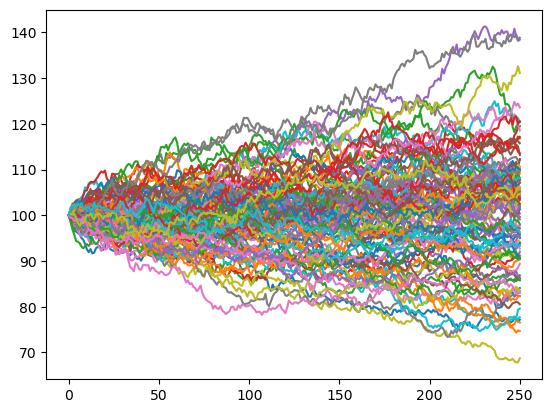

In [37]:
(X0*reality).T.plot(legend = False)

<AxesSubplot:>

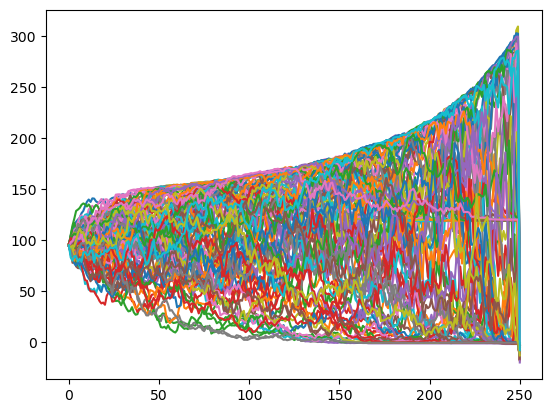

In [38]:
(money_time_put).T.plot(legend = False)

<AxesSubplot:>

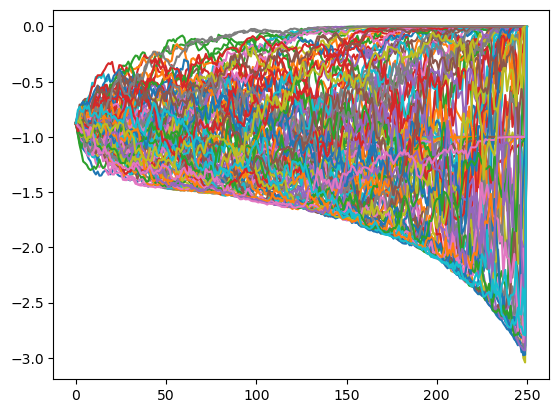

In [39]:
(delta_time_put).T.plot(legend = False)

(array([ 2., 13.,  6., 14.,  8.,  5.,  6.,  3.,  5., 38.]),
 array([-19.63598053, -17.63607125, -15.63616197, -13.63625268,
        -11.6363434 ,  -9.63643412,  -7.63652484,  -5.63661555,
         -3.63670627,  -1.63679699,   0.3631123 ]),
 <BarContainer object of 10 artists>)

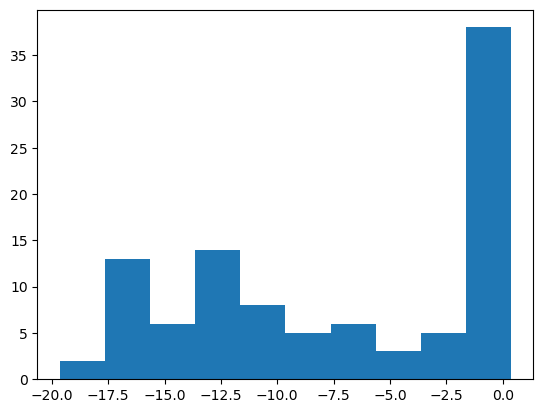

In [40]:
plt.hist(money_time_put.iloc[:,-1])

In [41]:
print(f'Empiric success probability with initial capital={BS_price_put/2:.2f} is: {(money_time_put.iloc[:,-1] >= -0.1*BS_price_put/2).mean()}')

Empiric success probability with initial capital=7.39 is: 0.32
